In [48]:
using Revise, BernsteinExpansions, DynamicPolynomials, BenchmarkTools, StaticArrays, Test, RangeEnclosures, Plots
using RangeEnclosures: enclose_binary, relative_precision

### Moore's function

In [2]:
@polyvar x

(x,)

The analytical bounds are $[1-\frac{4^4}{5^5}, 1] \approx [0.91808, 1]$.

In [3]:
1 - 4^4 // 5^5

2869//3125

In [30]:
xref = IntervalArithmetic.Interval(1-4^4/5^5, 1.)

[0.91808, 1]

In [ ]:
2 x^2 y + 3 x^2

In [31]:
f = 1 + x^5 - x^4

k = 5
dom = 0..1

[0, 1]

In [59]:
fpow(x) = 1 + IntervalArithmetic.pow(x, 5) - IntervalArithmetic.pow(x, 4)

fpow (generic function with 1 method)

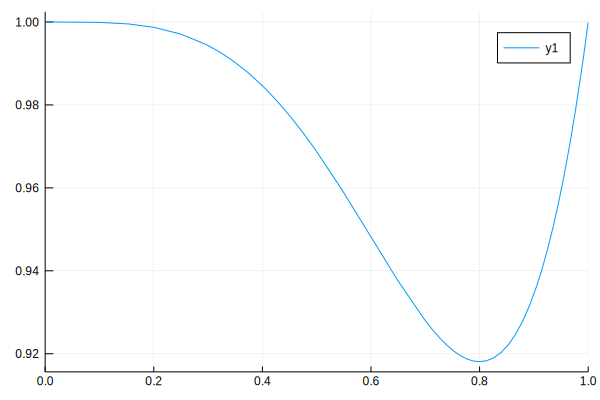

In [32]:
plot(x->f(x), xlims=(0, 1))

In [33]:
[_enclose_mince(f, dom, i) for i in [1, 2, 4, 8, 16, 32]]

6-element Array{Interval{Float64},1}:
 [0, 2]                 
     [0.03125, 1.9375]  
     [0.237304, 1.6836] 
     [0.512908, 1.41382]
     [0.724196, 1.22753]
     [0.838393, 1.11927]

In [34]:
[_enclose_mince_bernstein(f, dom, i) for i in [1, 2, 4, 8, 16, 32]]

6-element Array{Interval{Float64},1}:
 [0.8, 1]     
 [0.899999, 1]
 [0.915624, 1]
 [0.916943, 1]
 [0.917867, 1]
 [0.918004, 1]

In [35]:
@btime _enclose_mince($f, $dom, 32)

  165.308 μs (3387 allocations: 133.36 KiB)


[0.838393, 1.11927]

In [36]:
@btime _enclose_mince_bernstein($f, $dom, 16)

  12.601 μs (245 allocations: 22.98 KiB)


[0.917867, 1]

In [62]:
@btime _enclose_mince($fpow, $dom, 32)

  7.817 μs (5 allocations: 1.28 KiB)


[0.838393, 1.11927]

In [37]:
hull(_enclose_bernstein.(f, mince(dom, 32)))

[0.918004, 1]

In [38]:
[bernstein_bounds(f, 5, di) for di in mince(dom, 32)]

32-element Array{Interval{Float64},1}:
 [0.999999, 1]       
 [0.999985, 1]       
 [0.999929, 0.999986]
 [0.999786, 0.99993] 
 [0.999497, 0.999787]
 [0.998995, 0.999498]
 [0.998211, 0.998996]
 [0.99707, 0.998212] 
 [0.995502, 0.997071]
 [0.993443, 0.995503]
 [0.990836, 0.993444]
 [0.98764, 0.990837] 
 [0.983827, 0.987641]
  ⋮                  
 [0.936244, 0.94278] 
 [0.930186, 0.936245]
 [0.92494, 0.930187] 
 [0.920898, 0.924941]
 [0.918509, 0.920899]
 [0.918004, 0.91851] 
 [0.918286, 0.92081] 
 [0.920809, 0.926728]
 [0.926727, 0.936765]
 [0.936764, 0.951721]
 [0.95172, 0.972477] 
 [0.972476, 1]       

In [39]:
sum(hcat(bernstein_coefficients(f, 5, 0..1)...)', dims=1)

1×6 Array{Float64,2}:
 1.0  1.0  1.0  1.0  0.8  1.0

In [40]:
hcat(bernstein_coefficients(f, 5, 0..1)...)'

3×6 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
  0.0   0.0   0.0   0.0   0.0   1.0
 -0.0  -0.0  -0.0  -0.0  -0.2  -1.0
  1.0   1.0   1.0   1.0   1.0   1.0

In [41]:
bernstein_bounds(f, 5, 0..1)

[0.8, 1]

In [42]:
1-4^4/5^5

0.91808

In [43]:
_enclose_bernstein_binary(f, dom, kmax=40, tol=1e-10) # por que no mejora?

[0.8, 1]

In [44]:
bernstein_coefficients(f, 5, dom)

3-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]      
 [-0.0, -0.0, -0.0, -0.0, -0.2, -1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]      

In [45]:
bernstein_bounds(f, 5, dom)

[0.8, 1]

In [46]:
fcall = x -> f(x)
@btime enclose($fcall, $dom, :TaylorModels, order=5)

  78.805 μs (1441 allocations: 88.55 KiB)


[0.8125, 1.09375]

In [47]:
for i in [1, 2, 4, 8, 16, 32]
    println(i)
    println(_enclose_mince_taylor_models(fcall, dom, 5, i))
    @btime _enclose_mince_taylor_models($fcall, $dom, 5, $i)
end

1
[0.8125, 1.09375]
  80.198 μs (1446 allocations: 88.82 KiB)
2
[0.894531, 1.01368]
  165.643 μs (2941 allocations: 178.30 KiB)
4
[0.887176, 1.00184]
  335.555 μs (5943 allocations: 357.81 KiB)
8
[0.915083, 1.00036]
  675.962 μs (11959 allocations: 717.41 KiB)
16
[0.916588, 1.00003]
  1.358 ms (24003 allocations: 1.40 MiB)
32
[0.917904, 1.00001]
  2.720 ms (48103 allocations: 2.81 MiB)


In [57]:
println(" - - - - -")
for i in [1, 2, 4, 8, 16, 32]
    println(" i = $i")
    x_ia = _enclose_mince(f, dom, i) 
    @show relative_precision(x_ia, xref)
    @btime  _enclose_mince($f, $dom, $i) 
    println()
    
    x_ber = _enclose_mince_bernstein(f, dom, i) 
    @show relative_precision(x_ber, xref)
    @btime  _enclose_mince_bernstein($f, $dom, $i)
    println()
    
    x_tm = _enclose_mince_taylor_models(fcall, dom, 5, i)    
    @show relative_precision(x_tm, xref)
    @btime  _enclose_mince_taylor_models($fcall, $dom, 5, $i)

    println(" - - - - -")
end

 - - - - -
 i = 1
relative_precision(x_ia, xref) = [1120.7, 1220.71]
  3.226 μs (90 allocations: 3.94 KiB)

relative_precision(x_ber, xref) = [144.14, 0]
  959.733 ns (20 allocations: 1.66 KiB)

relative_precision(x_tm, xref) = [128.881, 114.441]
  79.785 μs (1446 allocations: 88.82 KiB)
 - - - - -
 i = 2
relative_precision(x_ia, xref) = [1082.55, 1144.41]
  8.406 μs (193 allocations: 7.95 KiB)

relative_precision(x_ber, xref) = [22.0703, 0]
  1.794 μs (35 allocations: 3.08 KiB)

relative_precision(x_tm, xref) = [28.746, 16.6894]
  164.435 μs (2941 allocations: 178.30 KiB)
 - - - - -
 i = 4
relative_precision(x_ia, xref) = [831.024, 834.466]
  18.571 μs (403 allocations: 16.17 KiB)

relative_precision(x_ber, xref) = [2.99682, 0]
  3.365 μs (65 allocations: 5.92 KiB)

relative_precision(x_tm, xref) = [37.7239, 2.23518]
  333.893 μs (5943 allocations: 357.81 KiB)
 - - - - -
 i = 8
relative_precision(x_ia, xref) = [494.593, 505.15]
  39.262 μs (827 allocations: 32.80 KiB)

relative_precis

## Appendix

In [23]:
function bernstein_coefficients(m, k, dom::Interval)
    coeffs = Vector{Vector{Float64}}(undef, nterms(m))
    for (i, ti) in enumerate(terms(m))
        coeffs[i] = univariate(ti, k, dom)
    end
    return coeffs
end

function bernstein_bounds(m, k, dom::Interval)
    #coeffs = bernstein_coefficients(m, k, dom)
    
    coeffs = Matrix{Float64}(undef, nterms(m), k+1) # k es l en el paquete..
    
    for (i, ti) in enumerate(terms(m))
        coeffs[i, :] = univariate(ti, k, dom)
    end
    
    coeffs_accum = sum(coeffs, dims=1)

    #min_coeff = minimum(map(minimum, coeffs))
    #max_coeff = maximum(map(maximum, coeffs))
    
    min_coeff = minimum(coeffs_accum)
    max_coeff = maximum(coeffs_accum)

    return Interval(min_coeff, max_coeff)
end

bernstein_bounds (generic function with 1 method)

In [24]:
_enclose_bernstein(f, dom) = bernstein_bounds(f, maxdegree(f), dom)

function _enclose_bernstein_binary(f, dom::Interval; kmax=3, tol=1e-3)
    y = _enclose_bernstein(f, dom)
    yinf, ysup = inf(y), sup(y)
    kmax == 0 && return Interval(yinf, ysup)
    x = bisect(dom)
    fx1 = _enclose_bernstein(f, x[1])
    fx2 = _enclose_bernstein(f, x[2])
    ynew = hull(fx1, fx2)
    ynew_inf, ynew_sup = inf(ynew), sup(ynew)
    inf_close = abs(yinf - ynew_inf) <= tol
    sup_close = abs(ysup - ynew_sup) <= tol
    both_close = inf_close && sup_close
    inf_improves = ynew_inf > yinf
    sup_improves = ynew_sup < ysup
    both_improve = inf_improves && sup_improves
    if both_close || !both_improve
        return Interval(yinf, ysup)
    end
    yinf = max(yinf, ynew_inf)
    ysup = min(ysup, ynew_sup)
    if inf_improves
        yinf = ynew_inf
    end
    if sup_improves
        ysup = ynew_sup
    end
    e1 = _enclose_bernstein_binary(f, x[1], kmax=kmax-1)
    e2 = _enclose_bernstein_binary(f, x[2], kmax=kmax-1)
    return Interval(hull(e1, e2))
end

_enclose_bernstein_binary (generic function with 1 method)

In [25]:
_enclose_mince(f, dom, nparts) = hull(f.(mince(dom, nparts)))

_enclose_mince (generic function with 1 method)

In [26]:
_enclose_mince_bernstein(f, dom, nparts) = hull(_enclose_bernstein.(f, mince(dom, nparts)))

_enclose_mince_bernstein (generic function with 1 method)

In [27]:
_enclose_mince_taylor_models(f, dom, ord, nparts) = hull([enclose(f, di, :TaylorModels, order=ord) for di in mince(dom, nparts)])

_enclose_mince_taylor_models (generic function with 1 method)